In [4]:
import pandas as pd

In [5]:
import os
print(os.getcwd())  
print(os.listdir()) 

C:\Users\User\Documents\MyProject\DataMinning\Data-Mining-on-Yearly-Stock-Quantity-Data-project\notebook
['.ipynb_checkpoints', 'Datamining.ipynb', 'online_retail_II.xlsx']


In [6]:
import os
print(os.getcwd())



C:\Users\User\Documents\MyProject\DataMinning\Data-Mining-on-Yearly-Stock-Quantity-Data-project\notebook


In [19]:
df = pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool | lib.NoDefault' = <no_default>,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    Keys to group by on the pivot table index. If a list is passed,
    it can contain any of the other types (except list). If an array is
    passed, it must be the same length as the data and will be used in
    the same manner as column values.
columns : column, Grouper

In [17]:
import matplotlib.pyplot as plt


In [20]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [21]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [23]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['year_month'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['quarter'] = df['InvoiceDate'].dt.to_period('Q').astype(str)


In [24]:
df = df[(df['year'] >= 2000) & (df['year'] <= 2010)]


In [25]:
yearly_stock = df.groupby('year')['Quantity'].sum().reset_index()
print(yearly_stock)


   year  Quantity
0  2009    420088
1  2010   5011953


In [26]:
mean_qty = df['Quantity'].mean()
mode_qty = df['Quantity'].mode()[0]

print("Mean Quantity:", mean_qty)
print("Mode Quantity:", mode_qty)


Mean Quantity: 10.337667305470815
Mode Quantity: 1


In [27]:
country_year = df.groupby(['Country', 'year'])['Quantity'].sum().reset_index()
print(country_year)


                 Country  year  Quantity
0              Australia  2009        53
1              Australia  2010     20000
2                Austria  2009       564
3                Austria  2010      5915
4                Bahrain  2010      1015
..                   ...   ...       ...
59  United Arab Emirates  2010      5262
60        United Kingdom  2009    382208
61        United Kingdom  2010   4046838
62           Unspecified  2010      3416
63           West Indies  2010       395

[64 rows x 3 columns]


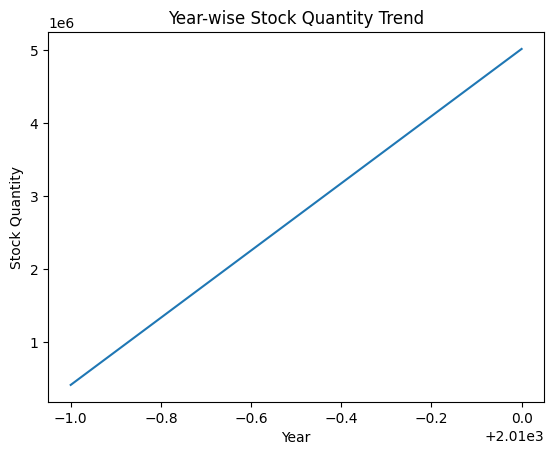

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(yearly_stock['year'], yearly_stock['Quantity'])
plt.xlabel("Year")
plt.ylabel("Stock Quantity")
plt.title("Year-wise Stock Quantity Trend")
plt.show()


In [29]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df['Description'] = df['Description'].fillna('Unknown')


In [30]:
yearly_stock = df.groupby('year')['Quantity'].sum().reset_index()
yearly_stock


,year,Quantity
0,2009,426981
1,2010,5404948


In [31]:
stats = df.groupby('year')['Quantity'].agg(['mean', 'median', 'std', 'min', 'max'])
stats


,mean,median,std,min,max
year,,,,,
2009,9.713606,3.0,53.956458,1,5184
2010,11.558691,4.0,89.225314,1,19152


In [32]:
country_year_stock = df.groupby(['Country', 'year'])['Quantity'].sum().reset_index()
country_year_stock


,Country,year,Quantity
0,Australia,2009,160
1,Australia,2010,20029
2,Austria,2009,564
3,Austria,2010,6133
4,Bahrain,2010,1025
...,...,...,...
57,United Arab Emirates,2010,5819
58,United Kingdom,2009,387812
59,United Kingdom,2010,4333043
60,Unspecified,2010,3434


In [33]:
best_year = yearly_stock.loc[yearly_stock['Quantity'].idxmax()]
best_year


year           2010
Quantity    5404948
Name: 1, dtype: int64

In [34]:
top_country = df.groupby('Country')['Quantity'].sum().idxmax()
top_country


'United Kingdom'

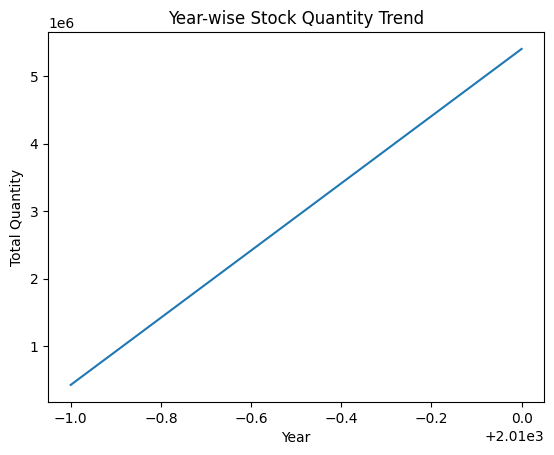

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(yearly_stock['year'], yearly_stock['Quantity'])
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.title("Year-wise Stock Quantity Trend")
plt.show()


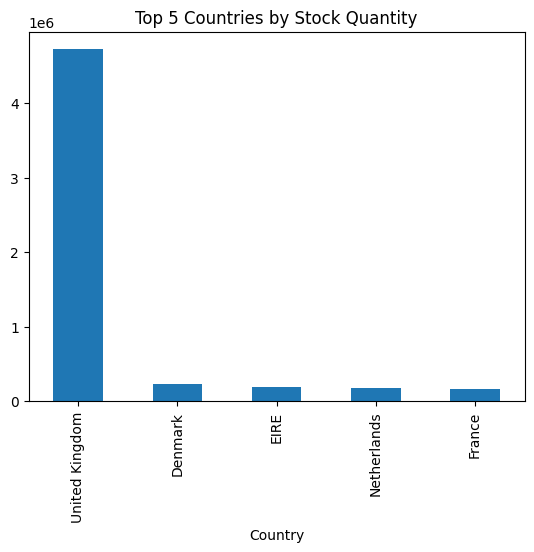

In [36]:
top5 = df.groupby('Country')['Quantity'].sum().nlargest(5)
top5.plot(kind='bar', title="Top 5 Countries by Stock Quantity")
plt.show()


In [37]:
summary = yearly_stock.merge(stats, on='year')
summary


,year,Quantity,mean,median,std,min,max
0,2009,426981,9.713606,3.0,53.956458,1,5184
1,2010,5404948,11.558691,4.0,89.225314,1,19152


In [38]:
summary.to_excel("yearly_stock_summary.xlsx", index=False)
